# CME538 - Introduction to Data Science
## Lecture 3.1 - Exploratory Data Analysis

### Introduction
In this notebook, we will explore the key principles of Exploratory Data Analysis (EDA), as covered in Lecture 3.1. The goal of EDA is to understand the structure, granularity, scope, temporality, spatiality, and faithfulness of the data before performing any further analysis or modeling.

EDA is not just a set of techniques but an attitude of flexibility and curiosity, as described by John Tukey: 
> "Exploratory data analysis is an attitude, a state of flexibility, a willingness to look for those things that we believe are not there, as well as those that we believe to be there."

#### ELI5: What is EDA?
Think of EDA as getting to know your new LEGO set before you start building. Before jumping in, you pour out all the pieces, look at their shapes, figure out how many of each you have, and maybe even look at the instructions (sometimes! :D). That’s what EDA does for data—it’s like sorting through the LEGO pieces and understanding what you’re working with before putting everything together.

#### Fun Fact:
Did you know that John Tukey, the pioneer of EDA, is also credited with coining the term "bit" (short for binary digit), which is a fundamental concept in computing today? Not only did he help shape how we explore data, but he also helped shape how we think about computers!

<img src="https://www.amphilsoc.org/sites/default/files/styles/item_detail_carousel/public/2019-10/Tukey%20graph%20head.jpg?itok=KT07rEvD" alt="John Tukey" width="300"/>

Throughout this notebook, we will examine three datasets:
1. **Titanic Dataset** - This is how clean data looks like. We will explore the structure and granularity of clean, well-structured data.
2. **NOAA Great Lakes Dataset** - We will analyze and understand unstructured data.
3. **Bicycle Counts Dataset** - We will explore the concept of temporality in data, examining how data changes over time.

By the end of this notebook, you will have a better understanding of how to approach EDA, ask the right questions, and use various Python libraries to gain insights into your data.

## Setup Notebook

In [1]:
# Import 3rd party libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")

<a id='section1'></a>
## 1. Titanic Dataset - Exploring Structure and Granularity of a Cleaned Dataset
We will use the Titanic dataset to explore the structure of well-organized data and examine its granularity, which refers to the level of detail within the dataset. Clean and structured datasets like Titanic provide an excellent starting point for EDA.

### Exploring Clean Data: Structure and Granularity in the Titanic Dataset
The Titanic dataset is an example of **clean, structured data**. Clean data refers to data that has already undergone processes to remove errors, inconsistencies, and missing values. It is organized in a clear format, where each column has a specific meaning, and each row represents a distinct observation.

- **Structure**: Clean data has a well-defined structure. In this case, each row represents a passenger, and the columns represent different attributes of those passengers, such as age, class, fare, and whether they survived the Titanic disaster. This organization allows us to easily understand and manipulate the data.
  
- **Granularity**: The level of detail in clean data is referred to as its granularity. In this dataset, each data point (e.g., age, fare) corresponds to a specific passenger, meaning the data is fine-grained, giving us detailed individual-level information.

Working with clean data, like the Titanic dataset, is much easier than working with raw or unstructured data because it requires less preprocessing. It allows us to directly focus on exploring patterns and relationships within the data without first having to clean it up.

In this section, we are
1. Loading and inspecting the Titanic dataset to understand its structure.
2. Exploring the granularity of the data by looking at specific attributes (e.g., Age, Fare, etc.).
3. Visualize key features of the dataset to get a deeper understanding of the data.

In [2]:
titanic = pd.read_csv('titanic.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


To better understand the **structure** and **granularity** of clean data, visualizations are essential. Visualizing data allows us to:
- Identify patterns and relationships between features.
- Understand the distribution and composition of our dataset.
- Spot any potential anomalies or outliers, even in clean datasets.

By visualizing this clean dataset, we can quickly grasp its structure and begin thinking about the relationships between different attributes.

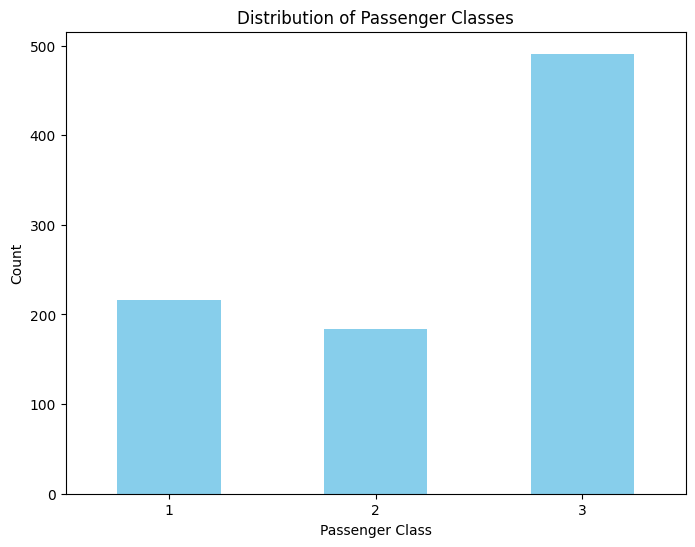

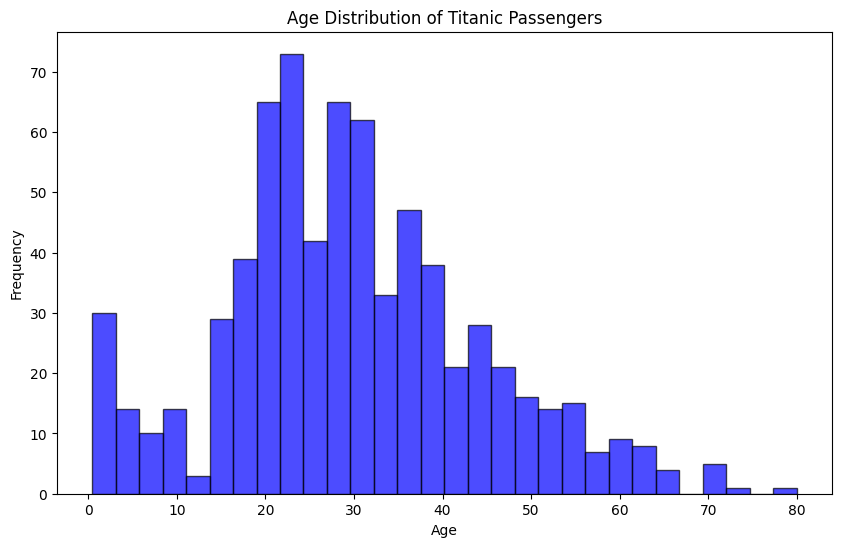

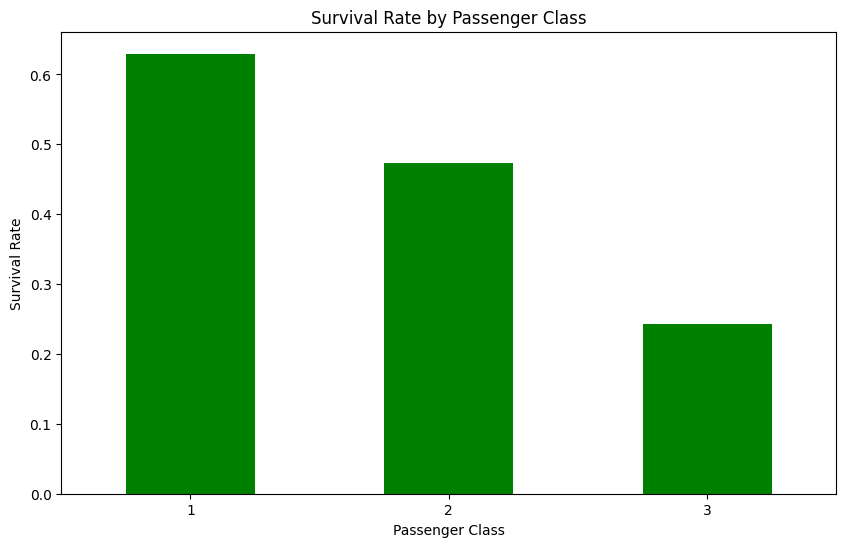

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic = pd.read_csv('titanic.csv')

# Preview the first 10 rows of the dataset
titanic.head(10)

# Visualize the distribution of passenger classes (Pclass)
plt.figure(figsize=(8, 6))
titanic['Pclass'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Visualize the distribution of passenger ages
plt.figure(figsize=(10, 6))
plt.hist(titanic['Age'].dropna(), bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualize Survival Rate by Class
survival_rate_by_class = titanic.groupby('Pclass')['Survived'].mean()
plt.figure(figsize=(10, 6))
survival_rate_by_class.plot(kind='bar', color='green')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

### Insights from the Visualizations:
- **Passenger Class Distribution**: We can see that the majority of passengers were in 3rd class, while 1st class had the fewest passengers. This tells us about the structure of the dataset and gives us an idea of how evenly distributed the data is across classes.
  
- **Age Distribution**: The age distribution shows a wide range of passengers from children to elderly adults. The distribution appears somewhat skewed, with more younger passengers. This granularity helps us understand the demographic breakdown of passengers on the Titanic.
  
- **Survival Rate by Class**: We observe a clear relationship between class and survival rate. Passengers in 1st class had a much higher survival rate than those in 3rd class, which provides valuable insights into the impact of class on survival.

### Why Clean Data is Important:
Working with **clean data**, like the Titanic dataset, makes it easier to conduct meaningful analyses without worrying about missing values, inconsistencies, or incorrect formats. Clean data:
- Reduces the amount of time needed for preprocessing.
- Ensures that the results of our analysis are more accurate and reliable.
- Allows us to focus on extracting insights rather than fixing errors.

By visualizing clean data, we can quickly start exploring relationships, identifying trends, and making data-driven decisions without unnecessary distractions.

<a id='section2'></a>
## 2. NOAA Great Lakes Dataset - Understanding Unstructured Data
The NOAA Great Lakes dataset demonstrates the challenges of working with unstructured data. In this section, we will focus on how to extract meaningful information from data that doesn’t have a clearly defined structure.

### Working with Unstructured Data
In contrast to the clean, structured Titanic dataset, the NOAA Great Lakes dataset presents a challenge because it is **unstructured**. Unstructured data doesn't have a predefined organization or clear structure, which means we can't directly analyze it like structured data.

- **What is Unstructured Data?**: Unstructured data can come in many forms, such as text, audio, video, or raw logs. It lacks the rows and columns format of structured data, making it harder to process and analyze.
  
- **Challenges**: With unstructured data, we need to spend time understanding its structure, cleaning it, and converting it into a usable format. This requires additional steps such as parsing text or extracting features.

In this section, we will:
1. Explore the raw NOAA dataset to understand its unstructured format.
2. Identify ways to extract useful information from the data.
3. Convert the unstructured data into a structured format for further analysis.


### Step 1: Inspecting the Raw NOAA Data
The first step in working with unstructured data is to **understand the raw format**. In this case, we are working with a raw text file from the NOAA Great Lakes dataset.

We will start by:
1. Reading the entire file to get a sense of how the data is organized.
2. Printing the first 500 characters to see how the data looks.
3. Splitting the data into lines so we can inspect different parts of it.

This is important because unstructured data doesn’t follow a clear structure, and we need to explore it to figure out how to extract useful information.

In [5]:
# Open and inspect the NOAA Great Lakes Dataset (as a raw text file)
with open('e202027712.0.wav', 'r') as file: # 'r' is the mode for reading
    noaa_data = file.read()

# Print the first 500 characters to get a sense of the unstructured format
print("First 500 characters of NOAA data:\n")
print(noaa_data[:500])

First 500 characters of NOAA data:

2020 277 13     /glcfs/bathy/erie2km.dat       WAVES                  6436
     1   0.121  119  1.7
     2   0.174  124  2.0
     3   0.079   98  1.2
     4   0.153  103  1.9
     5   0.212  114  2.3
     6   0.252  117  2.5
     7   0.285  113  2.6
     8   0.310  113  2.7
     9   0.055   88  0.9
    10   0.122   99  1.5
    11   0.193  100  2.0
    12   0.249  101  2.3
    13   0.296  102  2.7
    14   0.333  103  2.8
    15   0.361  105  2.9
    16   0.384  105  3.0
    17   0.402  106  3.1



In [6]:
# Split the data into lines to understand its layout (each line represents some data)
noaa_lines = noaa_data.split('\n')

# Show the first few lines
print("\nFirst 10 lines of NOAA data:\n")
print(noaa_lines[:10])


First 10 lines of NOAA data:

['2020 277 13     /glcfs/bathy/erie2km.dat       WAVES                  6436', '     1   0.121  119  1.7', '     2   0.174  124  2.0', '     3   0.079   98  1.2', '     4   0.153  103  1.9', '     5   0.212  114  2.3', '     6   0.252  117  2.5', '     7   0.285  113  2.6', '     8   0.310  113  2.7', '     9   0.055   88  0.9']


### What We Learned from Inspecting the Raw Data:
- **First 500 characters**: By printing the first 500 characters, we got an initial understanding of how the data is organized. We saw that the data appears as text with no clear structure, possibly containing numbers, labels, or other forms of information.
  
- **Lines of Data**: After splitting the data into lines, we saw that each line might represent a different piece of information. This gave us a better idea of how to start parsing and processing the data.

Understanding this raw data format is critical before we start cleaning or structuring it. It helps us decide what techniques or functions to use for extracting valuable information.

### Step 2: Inspecting Specific Lines of the NOAA Data
Now that we have a basic understanding of the raw data, we’ll inspect specific parts of the dataset to further understand its structure.

In this step, we will:
1. Look at a few lines of data (e.g., lines 6430 to 6445) to explore different sections of the file.
2. This deeper inspection helps us understand if there are patterns or certain lines that contain useful information.

This step is important because unstructured data often has meaningful patterns hidden in certain sections, and identifying those can guide us in the data extraction process.

In [7]:
# Show lines around a specific index (e.g., line 6430) to further inspect the data structure
print("\nLines 6430-6445 from NOAA data:\n")
print(noaa_lines[6430:6445])


Lines 6430-6445 from NOAA data:

['  6430   0.100  162  1.4', '  6431   0.103  143  1.5', '  6432   0.096  121  1.4', '  6433   0.062  173  1.1', '  6434   0.067  158  1.1', '  6435   0.053  153  1.0', '  6436   0.050  146  1.0', '2020 277 14     /glcfs/bathy/erie2km.dat       WAVES                  6436', '     1   0.078   89  1.1', '     2   0.113  102  1.5', '     3   0.093   67  1.2', '     4   0.118   78  1.4', '     5   0.139   91  1.5', '     6   0.162   97  1.7', '     7   0.194  101  1.9']


### What We Learned from Specific Lines:
- **Lines 6430-6445**: By inspecting these specific lines, we can start to see patterns or hints about the structure of the data. For instance, some lines might contain comma-separated values, while others might contain descriptive text or irrelevant information.
  
- **Why is this important?**: Unstructured data isn’t always uniform, meaning different sections of the file can contain different types of information. Identifying patterns in specific lines helps us decide which parts of the data are useful and how to clean or parse it.

This understanding will be helpful when we try to extract and clean the data.

### Step 3: Extracting and Structuring the NOAA Data
Now that we have a clearer idea of the NOAA data format, we can proceed to extract meaningful information. The data follows a consistent structure where each line contains an index followed by three numerical values.

In this step, we will:
1. Extract these values by splitting the lines based on spaces.
2. Store the extracted data in a structured format (like rows and columns).
3. This will allow us to analyze the data more easily in subsequent steps.

In [10]:
# Split the NOAA data into lines
noaa_lines = noaa_data.split('\n')

# Extract the relevant structured data
structured_data = []
for line in noaa_lines:
    parts = line.split()
    # Check if the line contains valid data (should have 4 parts: index and 3 values)
    if len(parts) == 4 and parts[0].isdigit():
        structured_data.append([int(parts[0]), float(parts[1]), int(parts[2]), float(parts[3])])

# Show the first 5 rows of structured data
for row in structured_data[:5]:
    print(row)

[1, 0.121, 119, 1.7]
[2, 0.174, 124, 2.0]
[3, 0.079, 98, 1.2]
[4, 0.153, 103, 1.9]
[5, 0.212, 114, 2.3]


### What We Learned from Extracting the Data:
- **Structured Data**: We successfully extracted the numerical values from each line of the NOAA dataset and stored them in a structured format (rows and columns).
- Each row now contains four pieces of information: an index, followed by three numerical values. This format makes it easier to analyze or visualize the data.

### Why Structuring Data Matters:
Handling unstructured data often requires transforming it into a format that can be used for analysis. By converting the raw NOAA data into a structured format, we can now start performing statistical analysis, visualizations, or further cleaning.

<a id='section3'></a>
## 3. Bicycle Counts Dataset - Temporal Analysis
In this section, we will explore how data can change over time using the Bicycle Counts dataset. This introduces the concept of temporality in EDA, which is crucial for analyzing time-series data.

### Understanding Temporality in Data
The **Bicycle Counts dataset** provides an opportunity to explore **temporality**, which refers to how data is situated in time and how it changes over a period.

In time-series data like this, understanding trends and patterns over time is crucial for making predictions and drawing insights.

In this section, we will:
1. Load and inspect the Bicycle Counts dataset.
2. Parse the time component of the data (e.g., dates).
3. Visualize how the bicycle traffic fluctuates over time.
4. Identify any trends or patterns in the data that may be useful for future analysis.

This is important because time-series analysis is commonly used in fields such as traffic management, climate studies, and sales forecasting.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Bicycle Counts dataset
bike_count = pd.read_csv('bike_traffic_data.csv')

# Convert the 'Date' column to datetime format
bike_count['Date'] = pd.to_datetime(bike_count['Date'])

# Preview the dataset
bike_count.head(10)

/var/folders/m2/g6f50pc937n2k89_w_2jfbvc0000gn/T/ipykernel_84734/528622773.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bike_count['Date'] = pd.to_datetime(bike_count['Date'])


,Date,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
0,2012-10-03 00:00:00,9.0,4.0
1,2012-10-03 01:00:00,6.0,4.0
2,2012-10-03 02:00:00,1.0,1.0
3,2012-10-03 03:00:00,3.0,2.0
4,2012-10-03 04:00:00,1.0,6.0
5,2012-10-03 05:00:00,10.0,21.0
6,2012-10-03 06:00:00,50.0,105.0
7,2012-10-03 07:00:00,95.0,257.0
8,2012-10-03 08:00:00,146.0,291.0
9,2012-10-03 09:00:00,104.0,172.0


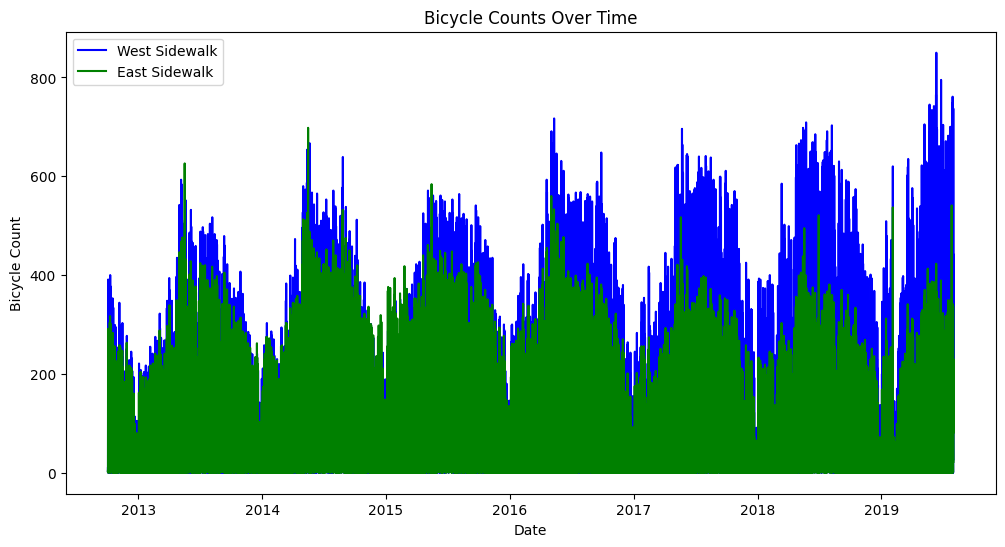

In [15]:
# Plot the bicycle counts over time
plt.figure(figsize=(12, 6))
plt.plot(bike_count['Date'], bike_count['Fremont Bridge West Sidewalk'], label='West Sidewalk', color='blue')
plt.plot(bike_count['Date'], bike_count['Fremont Bridge East Sidewalk'], label='East Sidewalk', color='green')
plt.title('Bicycle Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Bicycle Count')
plt.legend()
plt.show()

### Insights from the Temporal Analysis:
- **Fluctuations in Bicycle Counts**: From the plot, we can see how the number of bicycles fluctuates over time. There may be periods with more traffic, potentially corresponding to specific seasons, holidays, or weather conditions.
  
- **East vs. West Sidewalk Comparison**: The visualization allows us to compare the bicycle traffic on both sidewalks, revealing any differences in usage patterns.

### Why Temporality Matters:
Understanding temporality is key for making time-based predictions and identifying trends in data. In the context of bicycle counts, analyzing how traffic changes over time can inform traffic management decisions, identify peak hours for commuting, or highlight the impact of external factors like weather or events.

Time-series data is used across many fields, from predicting stock prices to monitoring environmental changes, making it an essential skill in data science.